## 信息熵
https://www.zhihu.com/question/22178202/answer/161732605

## 代码

In [1]:
def createdataSet():
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels

### 计算给定数据集的香农熵

In [2]:
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet: # the the number of unique elements and their occurance
        currentLabel = featVec[-1] # the last column is used for the labels
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) # log base 2
    return shannonEnt

### 按照给定特征划分数据集

In [3]:
def splitDataSet(dataSet, axis, value): # axis is the feature index, value is the feature value
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] # chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

## 选择最好的数据集划分方法

In [4]:
def chooseBestFeatureToSplit(dataSet): # choose the best feature to split the data set
    numFeatures = len(dataSet[0]) - 1 # the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet) # the base entropy
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures): # iterate over all the features
        featList = [example[i] for example in dataSet] # create a list of all the examples of this feature
        uniqueVals = set(featList) # get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals: # calculate entropy for each split
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet) # calculate the new entropy
        infoGain = baseEntropy - newEntropy # calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain): # compare this to the best gain so far
            bestInfoGain = infoGain # if better than current best, set to best
            bestFeature = i
    return bestFeature # returns an integer

In [5]:
myDat,labels = createdataSet()
chooseBestFeatureToSplit(myDat)

0

## 构建树的代码

In [6]:
def majorityCnt(classList):
    classCount={}
    for vote in classList: # create dictionary of all possible classes
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=lambda x:x[1], reverse=True) # sort dictionary by value
    return sortedClassCount[0][0]

In [7]:
def createTree(dataSet, labels):
    calssList = [example[-1] for example in dataSet] # 包含数据集的所有类标签
    print(calssList)
    if calssList.count(calssList[0]) == len(calssList): # 停止条件是所有的类标签都相同
        return calssList[0]
    if len(dataSet[0]) == 1: # 停止条件是使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组
        return majorityCnt(calssList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}} # create tree with the best feature label
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet] # get list of unique values
    uniqueVals = set(featValues)
    for value in uniqueVals: # create sub-tree for each unique value
        subLabels = labels[:] # copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree


In [8]:
myDat,labels = createdataSet()
myTree = createTree(myDat,labels)
print('*******\n:',myTree)

['yes', 'yes', 'no', 'no', 'no']
['no', 'no']
['yes', 'yes', 'no']
['no']
['yes', 'yes']
*******
: {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


## 绘制树形图

In [9]:
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)

'''def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('decision node',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('leaf node',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()'''

"def createPlot():\n    fig = plt.figure(1,facecolor='white')\n    fig.clf()\n    createPlot.ax1 = plt.subplot(111,frameon=False)\n    plotNode('decision node',(0.5,0.1),(0.1,0.5),decisionNode)\n    plotNode('leaf node',(0.8,0.1),(0.3,0.8),leafNode)\n    plt.show()"

In [16]:
createPlot()

TypeError: createPlot() missing 1 required positional argument: 'inTree'

In [11]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0] # the first key tells you what feature was split on
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict': # test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0] # the first key tells you what feature was split on
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict': # test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [12]:
def plotMidText(cntrPt,parentPt,txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumLeafs(myTree) # this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0] # the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff) # 这个节点的位置
    plotMidText(cntrPt,parentPt,nodeTxt) # 标记子节点属性值
    plotNode(firstStr,cntrPt,parentPt,decisionNode) # 标记节点
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD # 减少y偏移
    for key in secondDict.keys(): # 遍历子节点
        if type(secondDict[key]).__name__=='dict': # test to see if the nodes are dictonaires, if not they are leaf nodes
            plotTree(secondDict[key],cntrPt,str(key)) # 递归绘制子节点
        else: # it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW # 增加x偏移
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode) # 标记叶节点
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key)) # 标记叶节点属性值
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD # 增加y偏移

def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops) # no ticks
    plotTree.totalW = float(getNumLeafs(inTree)) # 树的宽度
    plotTree.totalD = float(getTreeDepth(inTree)) # 树的深度
    plotTree.xOff = -0.5/plotTree.totalW;plotTree.yOff = 1.0; # x偏移
    plotTree(inTree,(0.5,1.0),'') # 绘制树
    plt.show()

In [13]:
def classify(inputTree, featLabels, testVec):
    firstStr = inputTree.key()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr) # 将标签字符串转换为索引
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict': # test to see if the nodes are dictonaires, if not they are leaf nodes
                classLabel = classify(secondDict[key],featLabels,testVec) # 递归分类
            else: classLabel = secondDict[key]
    return classLabel

## 存储 提取 决策树

In [14]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close

def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

### 实例

['no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses']
['no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses']
['soft', 'hard', 'soft', 'hard', 'soft', 'hard', 'soft', 'no lenses', 'no lenses', 'hard', 'soft', 'no lenses']
['soft', 'soft', 'soft', 'soft', 'no lenses', 'soft']
['soft', 'soft']
['soft', 'soft']
['no lenses', 'soft']
['no lenses']
['soft']
['hard', 'hard', 'hard', 'no lenses', 'hard', 'no lenses']
['hard', 'hard', 'hard']
['hard', 'no lenses', 'no lenses']
['no lenses']
['hard']
['no lenses']


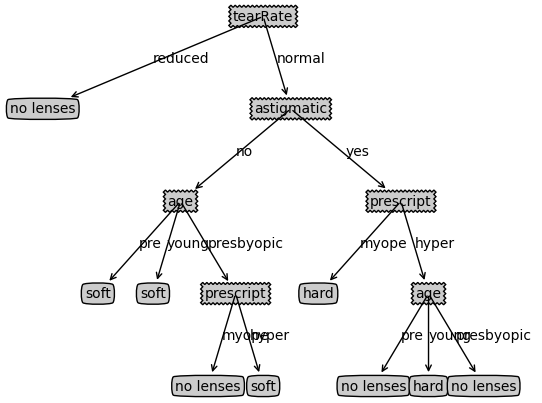

In [15]:
fr = open("/Users/remakeee/Library/Mobile Documents/iCloud~md~obsidian/Documents/book_study/python/machinelearninginaction/Ch03/lenses.txt")
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
lensesTree
createPlot(lensesTree)